# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [12]:
df_read=pd.read_csv('../data/checker_timestamp.csv')
df_read.info()
df_read.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3207 non-null   object
dtypes: object(1)
memory usage: 25.2+ KB


,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [13]:
df_read['timestamp']=pd.to_datetime(df['timestamp'])
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


In [259]:
df_read['date']=df_read['timestamp'].dt.date
df_read['hour']=df_read['timestamp'].dt.hour.apply(
    lambda x: 'AM' if x < 12 else 'PM'
)
df_read.head()

,timestamp,hour,target,date
0,2020-04-17 05:19:02.744528,AM,working_day,2020-04-17
1,2020-04-17 05:22:35.249331,AM,working_day,2020-04-17
2,2020-04-17 05:22:45.549397,AM,working_day,2020-04-17
3,2020-04-17 05:34:14.691200,AM,working_day,2020-04-17
4,2020-04-17 05:34:24.422370,AM,working_day,2020-04-17


In [260]:
df_read['target']=df_read['timestamp'].dt.day_of_week.map(
    lambda x: 'working_day' if x < 5 else 'weekend'
    )
df_read.tail()

,timestamp,hour,target,date
3202,2020-05-21 20:19:06.872761,PM,working_day,2020-05-21
3203,2020-05-21 20:22:41.785725,PM,working_day,2020-05-21
3204,2020-05-21 20:22:41.877806,PM,working_day,2020-05-21
3205,2020-05-21 20:37:00.129678,PM,working_day,2020-05-21
3206,2020-05-21 20:37:00.290491,PM,working_day,2020-05-21


In [261]:
df = df_read.pivot_table(
    index=['date', 'target'],
    columns='hour',
    values='timestamp',
    aggfunc='count',
    fill_value=0
).reset_index()
df.columns.name = None
df

,date,target,AM,PM
0,2020-04-17,working_day,21,2
1,2020-04-18,weekend,1,68
2,2020-04-19,weekend,18,15
3,2020-04-20,working_day,2,23
4,2020-04-21,working_day,0,25
5,2020-04-22,working_day,0,28
6,2020-04-23,working_day,10,33
7,2020-04-24,working_day,2,14
8,2020-04-25,weekend,30,74
9,2020-04-26,weekend,28,233


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

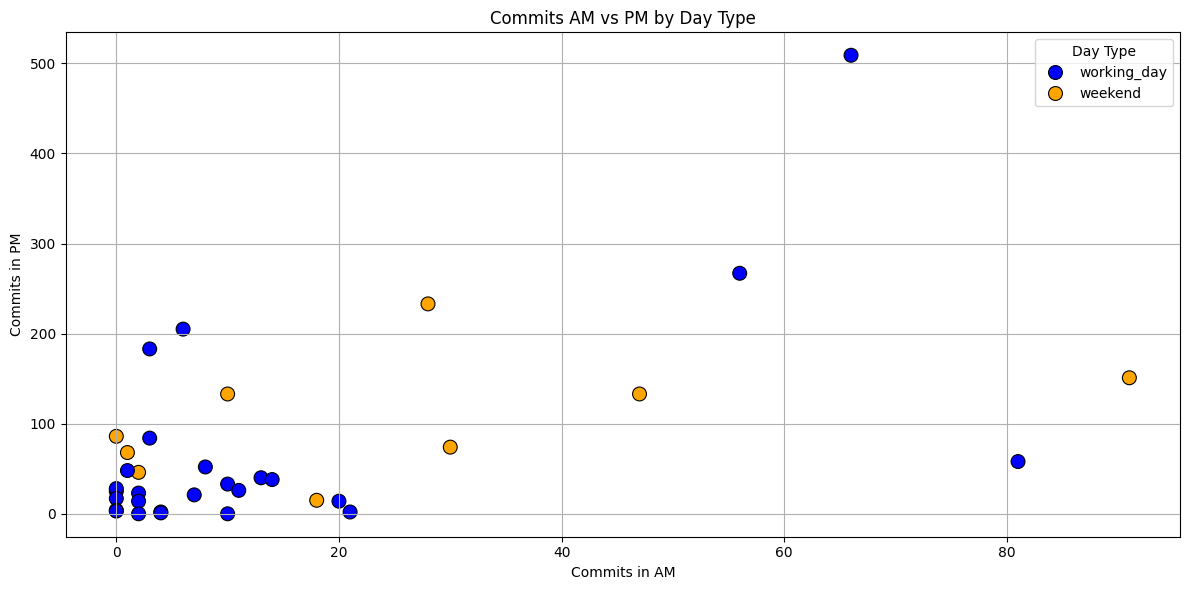

In [262]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='AM',
    y='PM',
    hue='target',
    palette={'working_day': 'blue', 'weekend': 'orange'},
    s=100, 
    edgecolor='black'
)

plt.title('Commits AM vs PM by Day Type')
plt.xlabel('Commits in AM')
plt.ylabel('Commits in PM')
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


`no, it is not easy`

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [264]:
x=df[['AM','PM']]
x

,AM,PM
0,21,2
1,1,68
2,18,15
3,2,23
4,0,25
5,0,28
6,10,33
7,2,14
8,30,74
9,28,233


In [279]:
le=LabelEncoder()
y=le.fit_transform(df['target'])
y

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [280]:
model = LogisticRegression( random_state=21 , fit_intercept=False )

model.fit(x,y)

LogisticRegression(fit_intercept=False, random_state=21)

In [292]:
y_pred = model.predict(x)
y_text = le.inverse_transform(y_pred)
y_text

array(['weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day'], dtype=object)

In [299]:
df['predict']=y_text
df = df.rename(columns={'AM': 'am', 'PM': 'pm'})
df=df[['date','am','pm','target','predict']]
df

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


In [300]:
df.to_csv('../data/am_pm.csv')

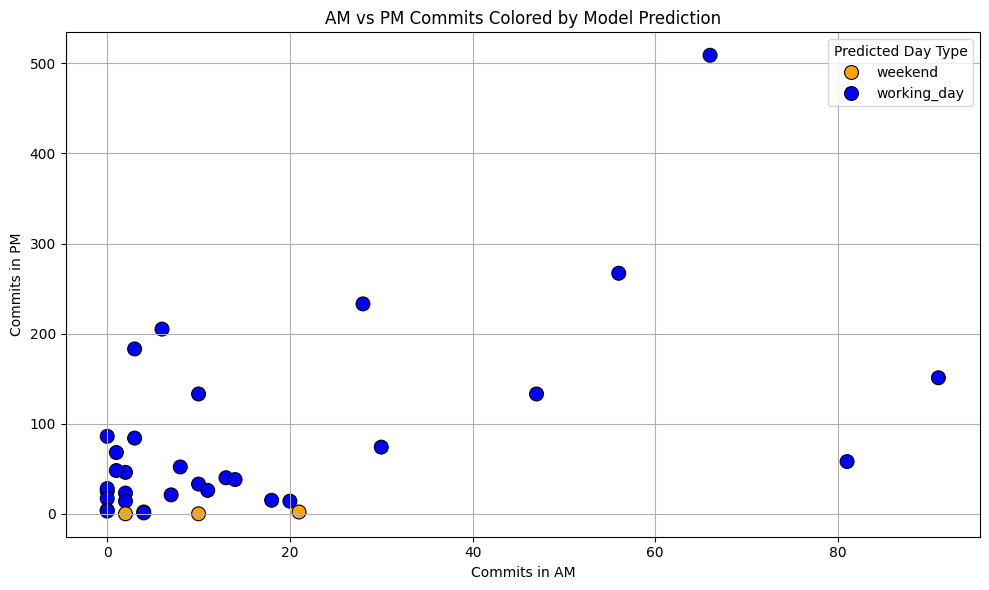

In [309]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='am',
    y='pm',
    hue='predict',
    palette={'working_day': 'blue', 'weekend': 'orange'},
    s=100,
    edgecolor='black'
)

plt.title('AM vs PM Commits Colored by Model Prediction')
plt.xlabel('Commits in AM')
plt.ylabel('Commits in PM')
plt.grid(True)
plt.legend(title='Predicted Day Type')
plt.tight_layout()
plt.show()

```no, it is not good```

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [312]:
accuracy_model = accuracy_score(df['target'], df['predict'])
print(f'Accuracy of the model: {accuracy_model * 100:.2f}%')

Accuracy of the model: 62.86%


In [ ]:
most_common = df['target'].value_counts().idxmax()
naive_predictions = [most_common] * len(df)
naive_accuracy = accuracy_score(df['target'], naive_predictions)
print(f'Accuracy of the native model: {naive_accuracy * 100:.2f}%')

Accuracy of the native model: 71.43%


`no, it is not good`